# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating data to view

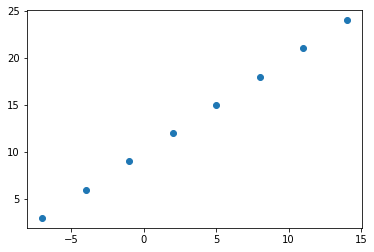

In [2]:
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x, y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

In [5]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn NumPy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

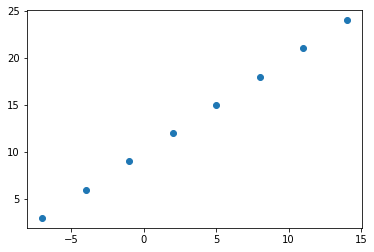

In [7]:
plt.scatter(x, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the **loss function** and the **optimizer** and **evaluation metrics**.
3. Fitting a model - letting the model try to find patterns between X and Y (features and labels).

* **Loss function** : The function which tells us how wrong it is
* **Optimizer** : Tells us how to improve the patterns its learning
* **Evaluation Metric** : What we can use to interpret the performance of our model

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8), # Input layer
    tf.keras.layers.Dense(1) # Output layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 291ms/step - loss: 12.1741 - mae: 12.1741
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.7328 - mae: 11.7328
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2834 - mae: 11.2834
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 10.8235 - mae: 10.8235
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.3507 - mae: 10.3507


In [9]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Making a prediction using the model
model.predict([17.0])

array([[17.059685]], dtype=float32)

In [11]:
# Optionally, we can also build an empty model and add layers to it later 
optional_model = tf.keras.Sequential()

# The first layer can also receive an 'input_shape' argument:
optional_model.add(tf.keras.layers.Dense(8, input_shape=(1,)))
optional_model.add(tf.keras.layers.Dense(1, input_shape=(8,)))

optional_model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

optional_model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 180ms/step - loss: 14.6906 - mae: 14.6906
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 14.3664 - mae: 14.3664
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 14.0476 - mae: 14.0476
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 13.7326 - mae: 13.7326
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 13.4199 - mae: 13.4199


In [12]:
optional_model.predict([17.])

array([[1.6232219]], dtype=float32)

## Improving the model

We can improve the model by altering the steps we took to create the model:

1. **Creating the model**
        1a. Add more layers
        1b. Increase the number of neurons in each layer
        1c. Change the activation function of each layer
  
2. **Compiling the model**
        2a. Change the optimization function
        2b. Change the learning rate of the optimization function

3. **Fitting the model**
        3a. Fit the model for more epochs
        3b. Give the model more training data

In [13]:
improved_model1 = tf.keras.Sequential()
improved_model1.add(tf.keras.layers.Dense(8, input_shape=(1,)))
improved_model1.add(tf.keras.layers.Dense(100))
improved_model1.add(tf.keras.layers.Dense(100))
improved_model1.add(tf.keras.layers.Dense(1))

improved_model1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

improved_model1.fit(tf.expand_dims(x, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 162ms/step - loss: 13.6158 - mae: 13.6158
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 12.3874 - mae: 12.3874
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 11.1291 - mae: 11.1291
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7418 - mae: 9.7418
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 8.1076 - mae: 8.1076
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 7.6517 - mae: 7.6517
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 7.7626 - mae: 7.7626
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 7.7985 - mae: 7.7985
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 7.3967 - mae: 7.3967
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 7.9969 - mae: 7.9969


In [14]:
improved_model1.predict([17.0])

array([[23.279066]], dtype=float32)

In [15]:
improved_model2 = tf.keras.Sequential()
improved_model2.add(tf.keras.layers.Dense(8, input_shape=(1,)))
improved_model2.add(tf.keras.layers.Dense(1))

improved_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

improved_model2.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 136ms/step - loss: 9.8806 - mae: 9.8806
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 9.3628 - mae: 9.3628
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 8.8244 - mae: 8.8244
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 8.2629 - mae: 8.2629
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 7.6751 - mae: 7.6751
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 7.3655 - mae: 7.3655
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3444 - mae: 7.3444
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3232 - mae: 7.3232
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3020 - mae: 7.3020
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 7.2807 - mae: 7.2807
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 7.259

1/1 [==============================] - 0s 1ms/step - loss: 5.3576 - mae: 5.3576
Epoch 90/100
1/1 [==============================] - 0s 1ms/step - loss: 5.3238 - mae: 5.3238
Epoch 91/100
1/1 [==============================] - 0s 1ms/step - loss: 5.2897 - mae: 5.2897
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 5.2552 - mae: 5.2552
Epoch 93/100
1/1 [==============================] - 0s 1ms/step - loss: 5.2203 - mae: 5.2203
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 5.1851 - mae: 5.1851
Epoch 95/100
1/1 [==============================] - 0s 1ms/step - loss: 5.1494 - mae: 5.1494
Epoch 96/100
1/1 [==============================] - 0s 1ms/step - loss: 5.1292 - mae: 5.1292
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 5.1484 - mae: 5.1484
Epoch 98/100
1/1 [==============================] - 0s 1ms/step - loss: 5.2319 - mae: 5.2319
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss: 5.0340 - ma

In [16]:
improved_model2.predict([17.0])

array([[29.654331]], dtype=float32)

In [17]:
improved_model3 = tf.keras.Sequential()
improved_model3.add(tf.keras.layers.Dense(20, input_shape=(1,), activation='relu'))
improved_model3.add(tf.keras.layers.Dense(1))

improved_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

improved_model3.fit(tf.expand_dims(x, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 141ms/step - loss: 12.9679 - mae: 12.9679
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 12.3713 - mae: 12.3713
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 11.7664 - mae: 11.7664
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 11.2372 - mae: 11.2372
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 10.6903 - mae: 10.6903
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 10.1480 - mae: 10.1480
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5917 - mae: 9.5917
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.0001 - mae: 9.0001
Epoch 9/10
1/1 [==============================] - 0s 0s/step - loss: 8.3672 - mae: 8.3672
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 7.6859 - mae: 7.6859


In [18]:
improved_model3.predict([17.0])

array([[21.63002]], dtype=float32)

In [19]:
improved_model4 = tf.keras.Sequential()
improved_model4.add(tf.keras.layers.Dense(20, input_shape=(1,)))
improved_model4.add(tf.keras.layers.Dense(1))

improved_model4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

improved_model4.fit(tf.expand_dims(x, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 164ms/step - loss: 11.7176 - mae: 11.7176
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 11.2893 - mae: 11.2893
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 10.8556 - mae: 10.8556
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 10.4162 - mae: 10.4162
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 9.9706 - mae: 9.9706
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 9.5180 - mae: 9.5180
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 9.0575 - mae: 9.0575
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 8.5882 - mae: 8.5882
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 8.1094 - mae: 8.1094
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 7.6203 - mae: 7.6203
Epoch 11/50
1/1 [==============================] - 0s 1ms/step - loss: 7.1202 -

In [20]:
improved_model4.predict([17.0])

array([[30.031414]], dtype=float32)

From testing multiple improvements of the model we can see some characteristics:

1. When models are simple (as in this case), increasing the number of hidden layers are pointless since the model can understand the complexity without much problems


2. Increasing the number of epochs can make the model learn better, but too high epoch can cause overfitting.


3. Since multiple improvements can have great affect in improving neural networks it is important not to make too many changes at the time, as we can't know which change is effecting the model and which are not.

## Evaluating the Model

### Visualization

In [21]:
long_x = tf.range(-100, 100, 4)
long_y = long_x + 10
long_x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [22]:
long_y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

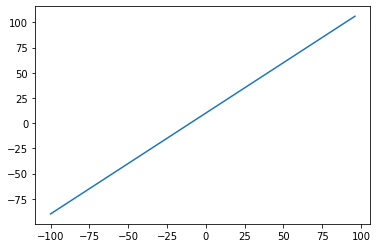

In [23]:
plt.plot(long_x, long_y)

## The 3 sets

* **Training set** - Usually approx 70-80 % of the dataset

* **Validation set** - Usually 10-15 % of the dataset

* **Test set** - Usually 10-15 % of the dataset

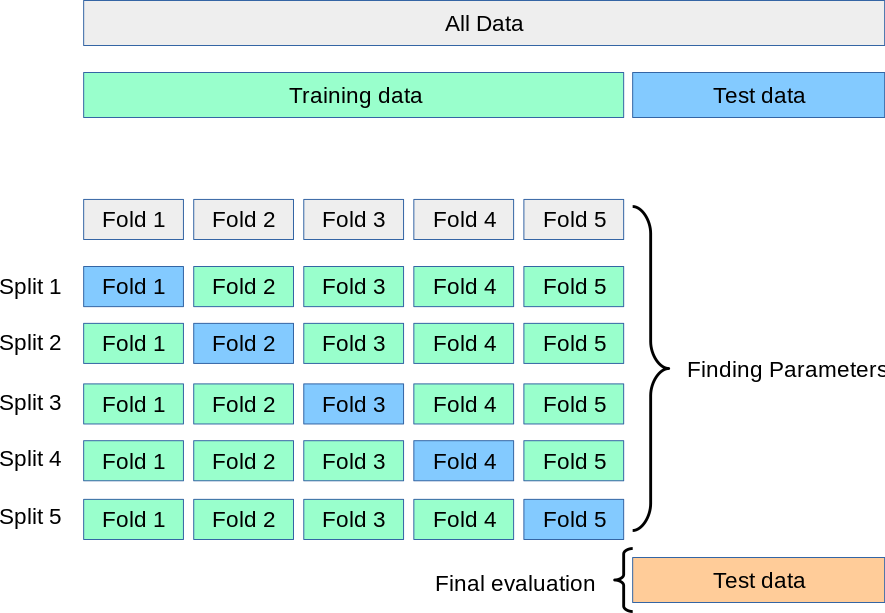


Note that the validation set is separate from the rest of the datasets

In [24]:
x_train = long_x[:40]
y_train = long_y[:40]

x_test = long_x[40:]
y_test = long_y[40:]

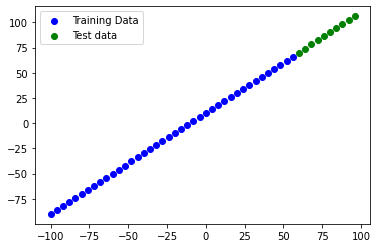

In [25]:
plt.scatter(x_train, y_train, c='b', label='Training Data')
plt.scatter(x_test, y_test, c='g', label='Test data')
plt.legend()
plt.show()

### Model Summary

In [26]:
new_model = tf.keras.Sequential()
new_model.add(tf.keras.layers.Dense(8, input_shape=(1,)))
new_model.add(tf.keras.layers.Dense(1))

new_model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
              metrics=['mse'])

In [27]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable params - These are the parameters the model can update as it trains.
* Non-trainable params - These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

https://deeplizard.com/learn/video/8d-9SnGt5E0

https://www.baeldung.com/cs/non-trainable-parameter#:~:text=Non%2Dtrainable%20parameters%20are%20model,the%20model%20is%20being%20used.

In [28]:
new_model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [29]:
y_pred = tf.squeeze(new_model.predict(x_test))
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.02043 ,  74.02171 ,  78.02301 ,  82.024284,  86.02557 ,
        90.02686 ,  94.028145,  98.02944 , 102.03072 , 106.032   ],
      dtype=float32)>

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

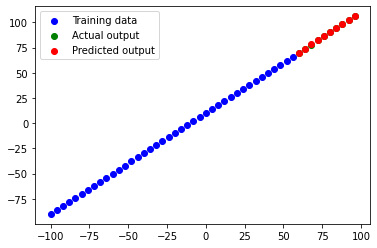

In [31]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='g', label='Actual output')
plt.scatter(x_test, y_pred, c='r', label='Predicted output')
plt.legend()
plt.show()

In [32]:
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0007010499>

In [33]:
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.026218414>

### Visualizing the model

In [34]:
from tensorflow.keras.utils import plot_model

In [35]:
plot_model(model=new_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Saving and Loading TensorFlow Models

https://www.tensorflow.org/tutorials/keras/save_and_load

1. SavedModel format - The SavedModel format is another way to serialize models. Models saved in this format can be restored using `tf.keras.models.load_model` and are compatible with TensorFlow Serving. The SavedModel guide goes into detail about how to serve/inspect the SavedModel.

2. HDF5 format - Keras provides a basic save format using HDF5 standard.

In [36]:
# Save model using SavedModel format
new_model.save('best_model_SavedModel')

INFO:tensorflow:Assets written to: best_model_SavedModel\assets


In [37]:
# Save model using HDF5 format
new_model.save('best_model_HDF5.h5')

In [38]:
# Loading in a SavedModel-model
savedModel_model = tf.keras.models.load_model("best_model_SavedModel")
savedModel_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [39]:
savedModel_preds = tf.squeeze(savedModel_model.predict(x_test))
savedModel_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.02043 ,  74.02171 ,  78.02301 ,  82.024284,  86.02557 ,
        90.02686 ,  94.028145,  98.02944 , 102.03072 , 106.032   ],
      dtype=float32)>

In [40]:
savedModel_preds == y_pred

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

Totally similar data

In [41]:
# Loading in the HDF5 model
hdf5_model = tf.keras.models.load_model('best_model_HDF5.h5')
hdf5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [42]:
hdf5_preds = tf.squeeze(hdf5_model.predict(x_test))
hdf5_preds

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.02043 ,  74.02171 ,  78.02301 ,  82.024284,  86.02557 ,
        90.02686 ,  94.028145,  98.02944 , 102.03072 , 106.032   ],
      dtype=float32)>

In [43]:
hdf5_preds == y_pred

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

# Working with a complex dataset

In [44]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Label = Charges\
Features = Every other column

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [46]:
x_data = insurance.drop('charges', axis=1)
y_data = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=8, shuffle=True)

ct = make_column_transformer(
        (MinMaxScaler(), ['age', 'bmi', 'children']),
        (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))

ct.fit(x_train)
x_train_normal = ct.transform(x_train)

ct.fit(x_test)
x_test_normal = ct.transform(x_test)

x_train = tf.constant(x_train_normal)
x_test = tf.constant(x_test_normal)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [47]:
complex_model = tf.keras.Sequential()
complex_model.add(tf.keras.layers.Dense(100))
complex_model.add(tf.keras.layers.Dense(10))
complex_model.add(tf.keras.layers.Dense(10))
complex_model.add(tf.keras.layers.Dense(1))

complex_model.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                      metrics=['mae'])

history = complex_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
30/30 [==============================] - 0s 544us/step - loss: 8769.0947 - mae: 8769.0947
Epoch 2/10
30/30 [==============================] - 0s 528us/step - loss: 4055.0710 - mae: 4055.0710
Epoch 3/10
30/30 [==============================] - 0s 624us/step - loss: 3659.7085 - mae: 3659.7085
Epoch 4/10
30/30 [==============================] - 0s 535us/step - loss: 3591.2520 - mae: 3591.2520
Epoch 5/10
30/30 [==============================] - 0s 577us/step - loss: 4458.5835 - mae: 4458.5835
Epoch 6/10
30/30 [==============================] - 0s 645us/step - loss: 4109.5317 - mae: 4109.5317
Epoch 7/10
30/30 [==============================] - 0s 574us/step - loss: 3748.7922 - mae: 3748.7922
Epoch 8/10
30/30 [==============================] - 0s 608us/step - loss: 3545.0449 - mae: 3545.0449
Epoch 9/10
30/30 [==============================] - 0s 616us/step - loss: 3715.7893 - mae: 3715.7893
Epoch 10/10
30/30 [==============================] - 0s 612us/step - loss: 3846.8308 - mae:

In [48]:
y_pred = tf.squeeze(complex_model.predict(x_test))

In [49]:
complex_model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 605us/step - loss: 3660.6985 - mae: 3660.6985


[3660.698486328125, 3660.698486328125]

Text(0, 0.5, 'loss')

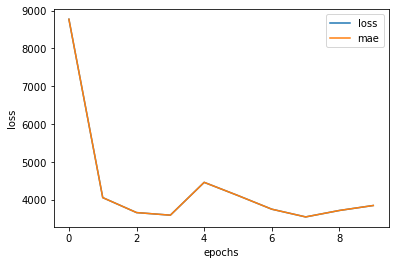

In [50]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')